<a href="https://colab.research.google.com/github/JencyCS/DataScience/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheth L.U.J and Sir M.V. college

Jency Nadar T095

Simple Linear Regression

       Sunlight_Hours  Temperature    Humidity  Growth_Milestone
count      193.000000   193.000000  193.000000        193.000000
mean         6.826484    25.076087   58.098927          0.497409
std          1.599509     5.354170   12.631799          0.501294
min          4.033133    15.200000   30.567682          0.000000
25%          5.477000    20.637095   49.300000          0.000000
50%          6.833290    25.912336   59.182806          0.000000
75%          8.241144    29.757938   69.100000          1.000000
max          9.913903    34.810103   79.648240          1.000000
Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


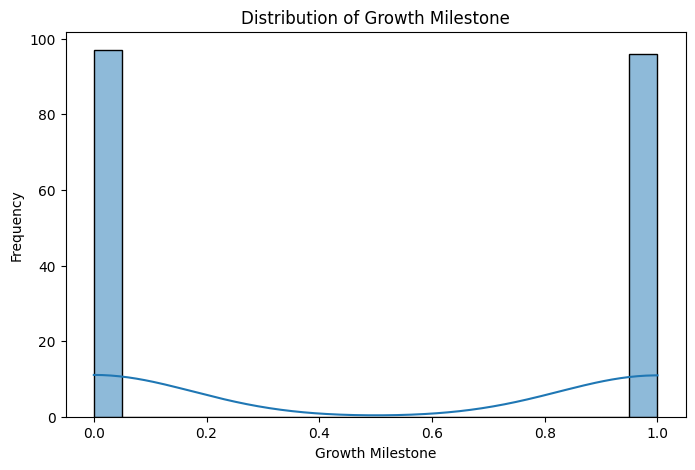

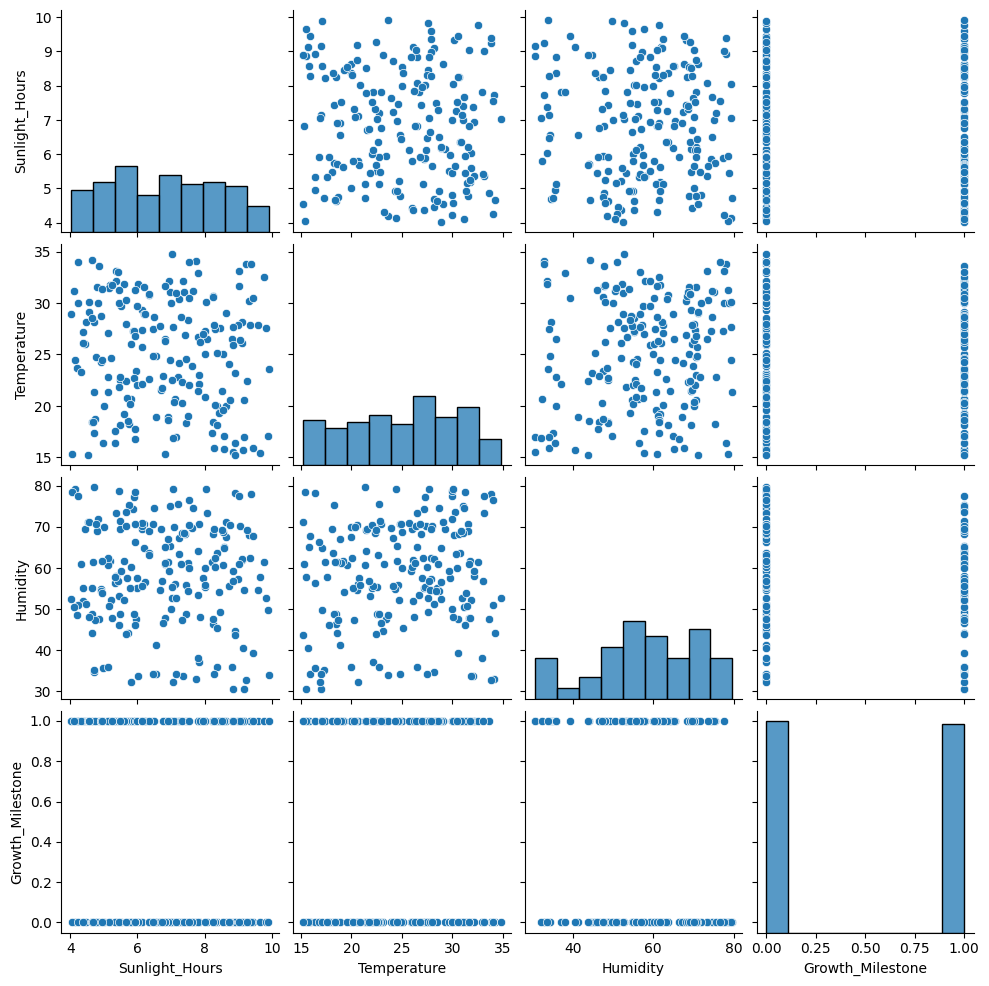

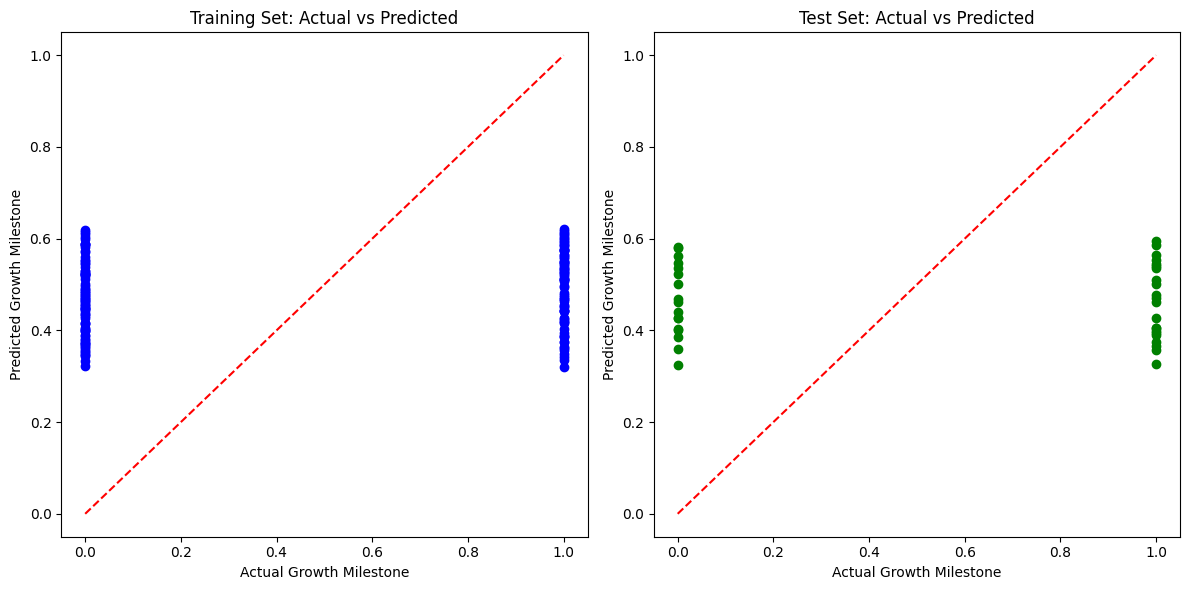

Simple Regression Coefficients:
const             0.826807
Sunlight_Hours   -0.051201
dtype: float64
Intercept: 0.8268067505441361


/tmp/ipython-input-3459078384.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", model_simple.params[0])


In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('plant_growth_data.csv')

# Data Analysis
print(df.describe())
print(df.isnull().sum())

# Data Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['Growth_Milestone'], bins=20, kde=True)
plt.title('Distribution of Growth Milestone')
plt.xlabel('Growth Milestone')
plt.ylabel('Frequency')
plt.show()

# Check the relationship
sns.pairplot(df)
plt.show()

# Split the dataset into dependent and independent variables
X_simple = df[['Sunlight_Hours']]  # Independent variable
Y = df['Growth_Milestone']          # Dependent variable

# Split data into Train/Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_simple, Y, test_size=0.2, random_state=42)

# Train the regression model
X_train = sm.add_constant(X_train)  # Add a constant (intercept)
model_simple = sm.OLS(Y_train, X_train).fit()

# Predict the result
X_test = sm.add_constant(X_test)
predictions_simple = model_simple.predict(X_test)

# Plot the training and test results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train, model_simple.predict(X_train), color='blue')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Growth Milestone')
plt.ylabel('Predicted Growth Milestone')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], '--', color='red')

# Plot test set data vs predictions
plt.subplot(1, 2, 2)
plt.scatter(Y_test, predictions_simple, color='green')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Growth Milestone')
plt.ylabel('Predicted Growth Milestone')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--', color='red')

plt.tight_layout()
plt.show()

# Regressor coefficients and intercept
print("Simple Regression Coefficients:")
print(model_simple.params)
print("Intercept:", model_simple.params[0])


Multiple Regression


Data Description:
       Sunlight_Hours  Temperature    Humidity  Growth_Milestone
count      193.000000   193.000000  193.000000        193.000000
mean         6.826484    25.076087   58.098927          0.497409
std          1.599509     5.354170   12.631799          0.501294
min          4.033133    15.200000   30.567682          0.000000
25%          5.477000    20.637095   49.300000          0.000000
50%          6.833290    25.912336   59.182806          0.000000
75%          8.241144    29.757938   69.100000          1.000000
max          9.913903    34.810103   79.648240          1.000000

Data Types:
Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object


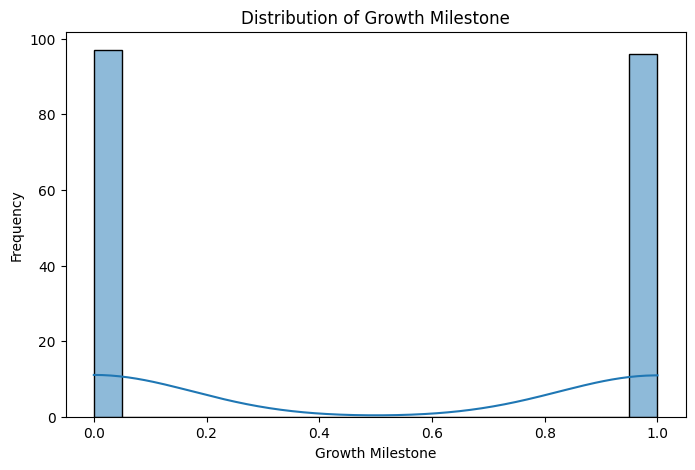

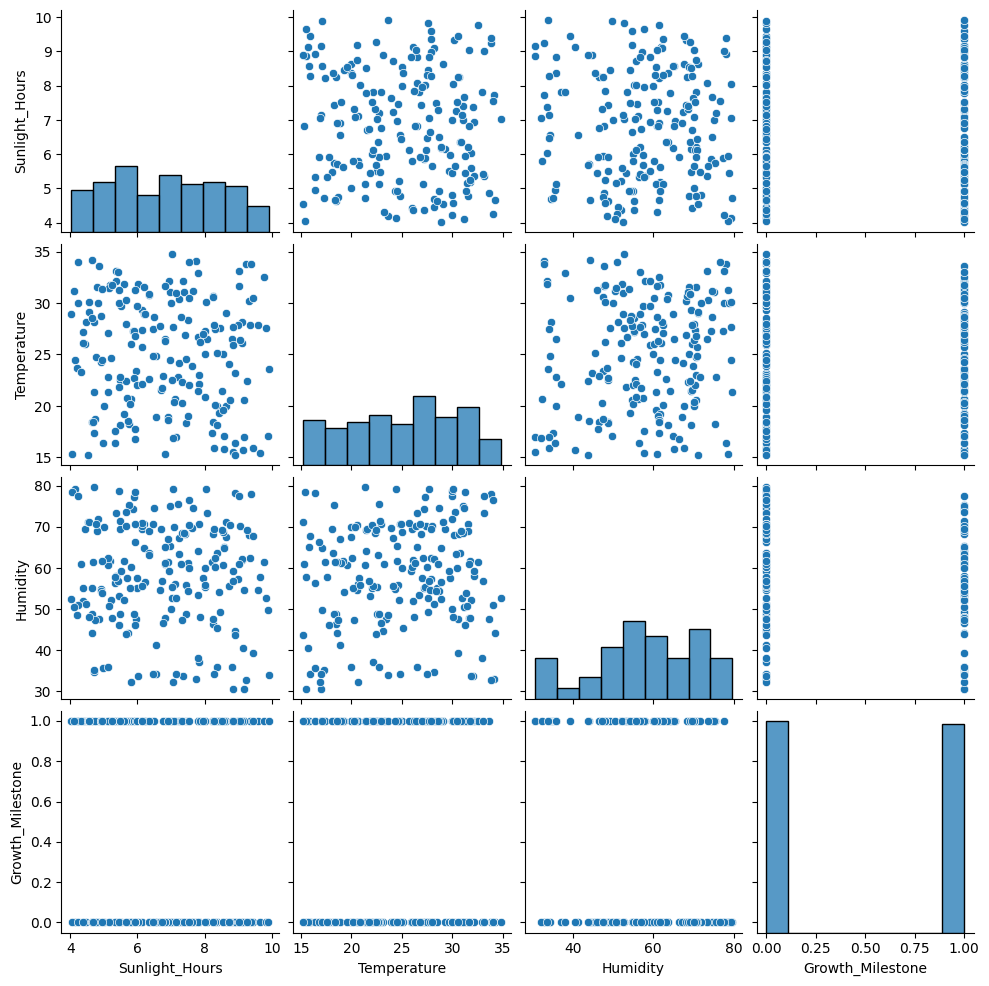


Transformed Independent Variables:
   Sunlight_Hours  Water_Frequency_daily  Water_Frequency_weekly  \
0        5.192294                  False                   False   
1        4.033133                  False                    True   
2        8.892769                  False                   False   
3        8.241144                  False                   False   
4        8.374043                  False                   False   

   Fertilizer_Type_none  Fertilizer_Type_organic  
0                 False                    False  
1                 False                     True  
2                  True                    False  
3                  True                    False  
4                 False                     True  


In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Step 1: Load your dataset
df = pd.read_csv('plant_growth_data.csv')

# Step 2: Data Analysis
print("Data Description:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Step 3: Data Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['Growth_Milestone'], bins=20, kde=True)
plt.title('Distribution of Growth Milestone')
plt.xlabel('Growth Milestone')
plt.ylabel('Frequency')
plt.show()

# Step 4: Check the relationship
sns.pairplot(df)
plt.show()

# Step 5: Split the dataset into dependent and independent variables
X_multiple = df[['Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type']]  # Independent variables
Y = df['Growth_Milestone']  # Dependent variable

# Step 6: Convert categorical variables to dummy variables
X_multiple = pd.get_dummies(X_multiple, drop_first=True)

# Step 7: Check the transformed independent variables
print("\nTransformed Independent Variables:")
print(X_multiple.head())  # Display the first few rows to check the conversion

# Step 8: Ensure there are no non-numeric values
if X_multiple.select_dtypes(include=['object']).any().any():
    raise ValueError("There are still non-numeric values in the independent variables.")

# Step 9: Split data into Train/Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_multiple, Y, test_size=0.2, random_state=42)

